Section 2 프로젝트의 목표는 개요에서 알려드린대로

데이터셋을 사용하여 머신러닝 모델을 만든 후 성능 및 인사이트를 도출 / 공유하는 것

으로 데이터셋 선정부터 모델 해석까지의 결과를 보여주는 것입니다.

데이터 전처리/EDA 부터 모델을 해석하는 과정을 코드로 작성하고, 해당 내용을 설명하는 영상을 제작하는 것이 이번 프로젝트 기간 동안 정진우님이 수행하셔야 하는 태스크입니다. 당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 정진우님의 자유입니다. 그러나, Section 2 Project인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

Section2 프로젝트에서는 머신러닝 모델을 사용해야 합니다! 배운 머신러닝 모델만 사용해야한다는 의미가 아니라 다양한 머신러닝 모델을 사용해보셔도 되는데 꼭 머신러닝 모델을 사용해주세요.(딥러닝 모델, 강화학습 모델 등등 아님)

추가로, 정진우님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.
즉 정진우님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하시기 바랍니다!

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('/content/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
df_clean = df.copy()

In [ ]:
df_clean['blueVisionScore'] = df['blueWardsPlaced'] + (df['blueWardsDestroyed']*2)
df_clean['redVisionScore'] = df['redWardsPlaced'] + (df['redWardsDestroyed']*2)

In [ ]:
df_clean['FirstBloodTeam'] = df_clean.apply(lambda row: 'blue' if row['blueFirstBlood'] == 1 else 'red', axis=1)

In [ ]:
df_clean['FirstBloodTeam'] = df_clean['FirstBloodTeam'].replace({'blue':1, 'red':0})

In [ ]:
df_clean.drop(['gameId', 'blueTotalExperience','redTotalExperience',
               'blueCSPerMin','redCSPerMin','blueDragons', 'blueHeralds','redDragons','redHeralds','blueWardsPlaced','blueWardsDestroyed','redWardsPlaced',
               'redWardsDestroyed','blueFirstBlood','redFirstBlood','redGoldDiff','redExperienceDiff'], axis=1, inplace=True)

In [ ]:
df_clean.rename(columns={'blueGoldDiff':'GoldDiff','blueExperienceDiff' : 'ExperienceDiff'},inplace=True)

In [ ]:
df_clean

,blueWins,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,...,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldPerMin,blueVisionScore,redVisionScore,FirstBloodTeam
0,0,9,6,11,0,0,17210,6.6,195,36,...,0,0,16567,6.8,197,55,1656.7,32,27,1
1,0,5,5,5,0,0,14712,6.6,174,43,...,2,1,17620,6.8,240,52,1762.0,14,14,0
2,0,7,11,4,1,0,16113,6.4,186,46,...,0,0,17285,6.8,203,28,1728.5,15,21,0
3,0,4,5,5,1,0,15157,7.0,201,55,...,0,0,16478,7.0,235,47,1647.8,45,19,0
4,0,6,6,6,0,0,16400,7.0,210,57,...,1,0,17404,7.0,225,67,1740.4,83,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,7,4,5,1,0,17765,7.2,211,69,...,0,0,15246,6.8,229,34,1524.6,21,52,1
9875,1,6,4,8,1,0,16238,7.2,233,48,...,0,0,15456,7.0,206,56,1545.6,54,54,0
9876,0,6,7,5,0,0,15903,7.0,210,45,...,1,0,18319,7.4,261,60,1831.9,25,14,0
9877,0,2,3,3,1,0,14459,6.6,224,48,...,0,0,15298,7.2,247,40,1529.8,22,74,1


In [ ]:
df_clean.isna().sum()

blueWins                        0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
GoldDiff                        0
ExperienceDiff                  0
blueGoldPerMin                  0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redTowersDestroyed              0
redTotalGold                    0
redAvgLevel                     0
redTotalMinionsKilled           0
redTotalJungleMinionsKilled     0
redGoldPerMin                   0
blueVisionScore                 0
redVisionScore                  0
FirstBloodTeam                  0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueKills                     9879 non-null   int64  
 2   blueDeaths                    9879 non-null   int64  
 3   blueAssists                   9879 non-null   int64  
 4   blueEliteMonsters             9879 non-null   int64  
 5   blueTowersDestroyed           9879 non-null   int64  
 6   blueTotalGold                 9879 non-null   int64  
 7   blueAvgLevel                  9879 non-null   float64
 8   blueTotalMinionsKilled        9879 non-null   int64  
 9   blueTotalJungleMinionsKilled  9879 non-null   int64  
 10  GoldDiff                      9879 non-null   int64  
 11  ExperienceDiff                9879 non-null   int64  
 12  blueGoldPerMin                9879 non-null   float64
 13  red

In [ ]:
X = df_clean.drop(['blueWins'], axis=1)  # 특성
y = df_clean['blueWins']  # 타겟

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print("타겟데이터의 비율\n",y.value_counts(normalize=True))

타겟데이터의 비율
 0    0.500962
1    0.499038
Name: blueWins, dtype: float64


In [ ]:
# 기준모델
base = y_train.mode()

y_pred_base = [base] * len(y_train)

print("training accuracy :", accuracy_score(y_train, y_pred_base).round(2))

training accuracy : 0.5


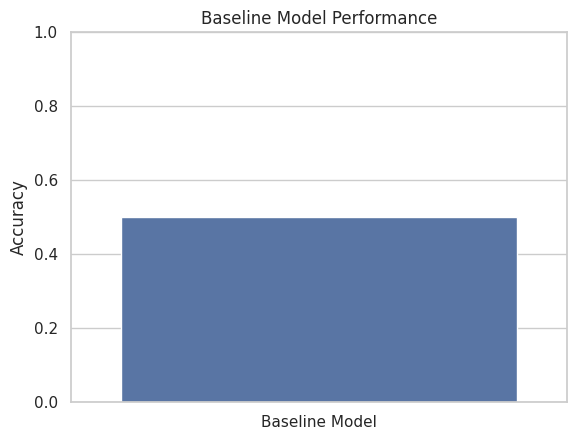

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_base)

sns.set(style="whitegrid")
sns.barplot(x=['Baseline Model'],
            y=[accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Baseline Model Performance')
plt.show()

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()

X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = scaler.transform(X_val[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
# 로지스틱 회귀 모델 학습

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# 로지스틱 회귀 모델 평가
y_val_lr_pred = lr_model.predict(X_val)
print('logistic train accuracy :', lr_model.score(X_train, y_train).round(2))
print("logistic validation accuracy :", accuracy_score(y_val, y_val_lr_pred).round(2))
lr_scores = cross_val_score(lr_model, X, y, cv=5, scoring='f1').mean()
lr_accuracy = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy').mean()
print("로지스틱 회귀 F1 스코어 :", lr_scores)
print("로지스틱 회귀 정확도 :", lr_accuracy)

logistic train accuracy : 0.73
logistic validation accuracy : 0.74
로지스틱 회귀 F1 스코어 : 0.7274046349728993
로지스틱 회귀 정확도 : 0.7283125608568646


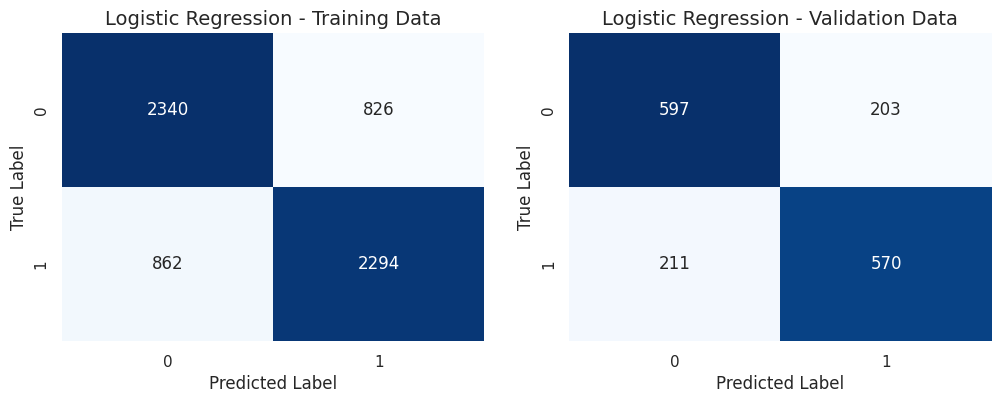

Logistic Regression - Training Accuracy : 0.73
Logistic Regression - Validation Accuracy : 0.74


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# 로지스틱 회귀 모델 예측값 생성
y_train_lr_pred = lr_model.predict(X_train)
y_val_lr_pred = lr_model.predict(X_val)

# 학습 데이터와 검증 데이터에 대한 예측 결과 시각화
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# 학습 데이터
sns.heatmap(confusion_matrix(y_train, y_train_lr_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            ax=axes[0], annot_kws={"fontsize": 12})
axes[0].set_title('Logistic Regression - Training Data', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# 검증 데이터
sns.heatmap(confusion_matrix(y_val, y_val_lr_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            ax=axes[1], annot_kws={"fontsize": 12})
axes[1].set_title('Logistic Regression - Validation Data', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

plt.show()

print("Logistic Regression - Training Accuracy :", accuracy_score(y_train, y_train_lr_pred).round(2))
print("Logistic Regression - Validation Accuracy :", accuracy_score(y_val, y_val_lr_pred).round(2))

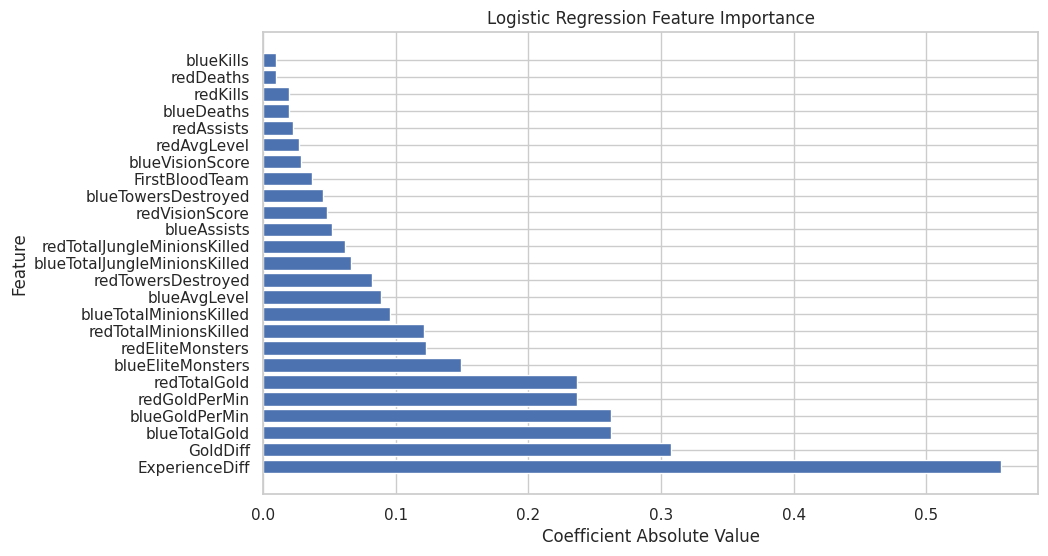

In [ ]:
lr_importances = np.abs(lr_model.coef_[0])
lr_indices = np.argsort(lr_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[lr_indices], lr_importances[lr_indices])
plt.xlabel('Coefficient Absolute Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

In [ ]:
# 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(max_depth = 5,
                                  random_state = 42,
                                  )
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# 랜덤포레스트 모델 평가
y_val_rf_pred = rf_model.predict(X_val)

print('randomforest train accuracy :', rf_model.score(X_train, y_train).round(2))
print("randomforest validation accuracy : ", accuracy_score(y_val, y_val_rf_pred).round(2))

rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1').mean()
rf_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()

print("랜덤포레스트 F1 스코어 :", rf_scores)
print('랜덤포레스트 정확도 :', rf_accuracy)

randomforest train accuracy : 0.74
randomforest validation accuracy :  0.74
랜덤포레스트 F1 스코어 : 0.72423573671696
랜덤포레스트 정확도 : 0.7269967713831804


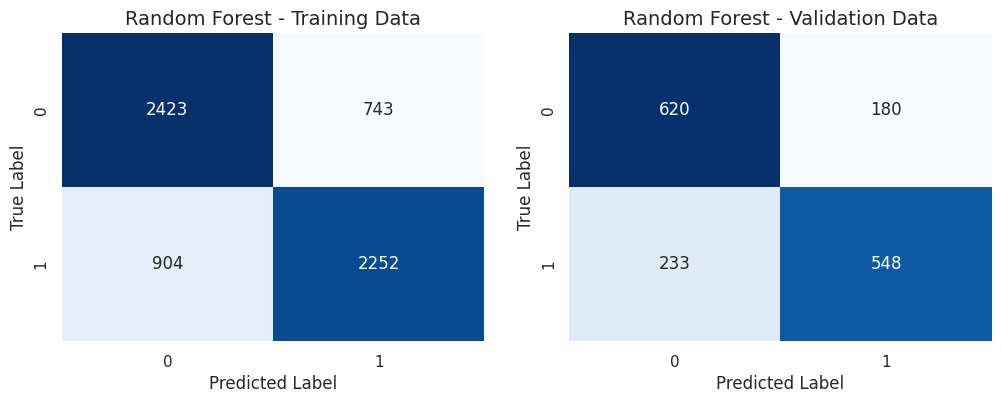

Random Forest - Training Accuracy : 0.74
Random Forest - Validation Accuracy : 0.74


In [ ]:
# 랜덤 포레스트 모델 예측값 생성
y_train_rf_pred = rf_model.predict(X_train)
y_val_rf_pred = rf_model.predict(X_val)

# 학습 데이터와 검증 데이터에 대한 예측 결과 시각화
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# 학습 데이터
sns.heatmap(confusion_matrix(y_train, y_train_rf_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            ax=axes[0], annot_kws={"fontsize": 12})
axes[0].set_title('Random Forest - Training Data', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# 검증 데이터
sns.heatmap(confusion_matrix(y_val, y_val_rf_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            ax=axes[1], annot_kws={"fontsize": 12})
axes[1].set_title('Random Forest - Validation Data', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

plt.show()

print("Random Forest - Training Accuracy :", accuracy_score(y_train, y_train_rf_pred).round(2))
print("Random Forest - Validation Accuracy :", accuracy_score(y_val, y_val_rf_pred).round(2))


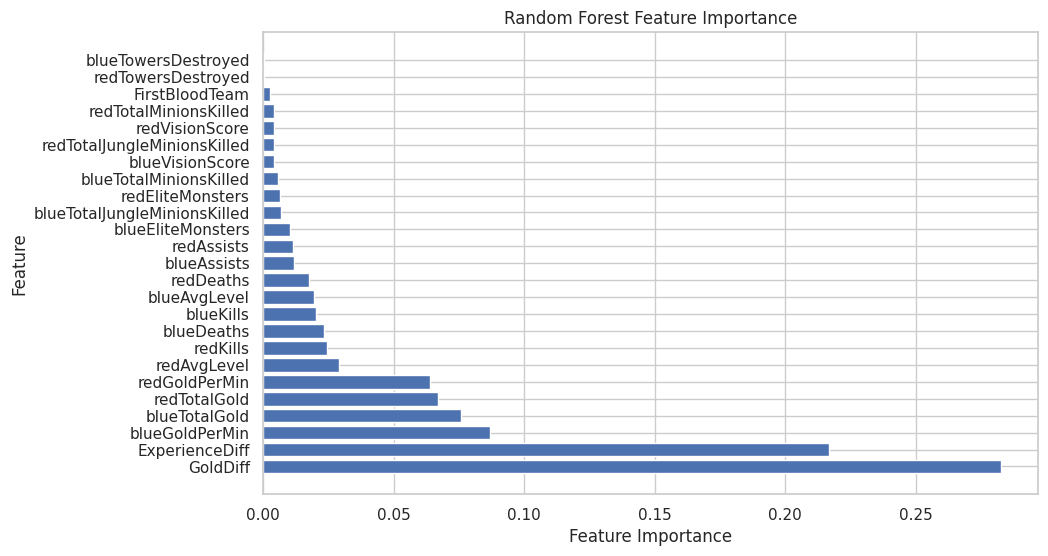

In [ ]:
# 랜덤포레스트 모델의 특성 중요도

rf_model_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_model_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[rf_indices], rf_model_importances[rf_indices]) # x축과 y축을 반전시켜 가로 막대 그래프로 표시
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# 테스트 데이터에 대한 예측
y_test_rf_pred = rf_model.predict(X_test)

# 테스트 데이터에 대한 성능 평가
rf_test_accuracy = accuracy_score(y_test, y_test_rf_pred)
rf_test_f1_score = f1_score(y_test, y_test_rf_pred)

print("Random Forest - Test Accuracy :", rf_test_accuracy.round(2))
print("Random Forest - Test F1 Score :", rf_test_f1_score.round(2))

Random Forest - Test Accuracy : 0.72
Random Forest - Test F1 Score : 0.72


In [ ]:
plt.style.use('default')

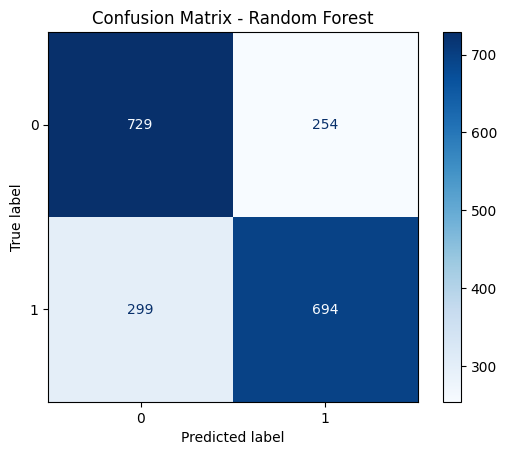

In [ ]:
cm = confusion_matrix(y_test, y_test_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# xgboost 모델 학습
xgb = XGBClassifier(random_state=42,
                    max_depth=5,
                    learning_rate=0.1,
                    n_estimators=200,
                    )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# XGB 모델 평가
y_val_xgb_pred = xgb.predict(X_val)

print('xgb train accuracy :', xgb.score(X_train, y_train).round(2))
print('xgb validation accuracy :', accuracy_score(y_val, y_val_xgb_pred).round(2))

xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='f1').mean()
xgb_accuracy = cross_val_score(xgb, X, y, cv=5, scoring='accuracy').mean()

print("xgb F1 스코어 :", xgb_scores)
print("xgb 정확도 :", xgb_accuracy)

xgb train accuracy : 0.85
xgb validation accuracy : 0.72
xgb F1 스코어 : 0.7186514321187805
xgb 정확도 : 0.7199101624557988


In [ ]:
print("검증 정확도", xgb.score(X_val, y_val))

print(
    classification_report(
        y_val, xgb.predict(X_val, iteration_range=(0, xgb.best_iteration))
    )
)

검증 정확도 0.7185325743200506
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       800
           1       0.73      0.69      0.71       781

    accuracy                           0.72      1581
   macro avg       0.72      0.72      0.72      1581
weighted avg       0.72      0.72      0.72      1581



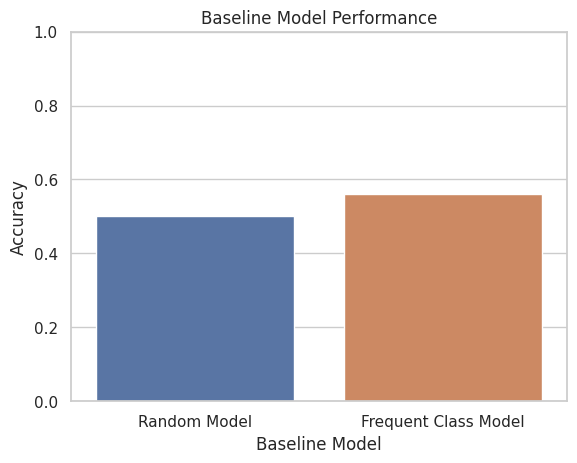

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값과 실제값 생성
np.random.seed(42)
y_true = np.random.randint(0, 2, size=(100,))
y_random = np.random.randint(0, 2, size=(100,))
y_frequent = np.zeros(100)

# 기준 모델: 무작위로 예측하는 랜덤 모델
random_accuracy = np.mean(y_true == y_random)

# 기준 모델: 가장 빈번하게 등장하는 클래스로 예측하는 모델
frequent_class = np.argmax(np.bincount(y_true))
y_frequent.fill(frequent_class)
frequent_accuracy = np.mean(y_true == y_frequent)

# 예측 결과 시각화
sns.set(style="whitegrid")
sns.barplot(x=['Random Model', 'Frequent Class Model'],
            y=[random_accuracy, frequent_accuracy])
plt.ylim(0, 1)
plt.xlabel('Baseline Model')
plt.ylabel('Accuracy')
plt.title('Baseline Model Performance')
plt.show()
